In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read u.data file
u_ratings_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
u_ratings = pd.read_csv('u.data', sep='\t', names=u_ratings_columns)

# Read u.info file
#u_info_columns = ['num_users', 'num_items', 'num_ratings']
#u_info = pd.read_csv('u.info', sep=' ', names=u_info_columns)

# Read u.item file
u_movies_columns = ['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
                  'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                  'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
u_movies = pd.read_csv('u.item', sep='|', names=u_movies_columns, encoding='latin-1')

# Read u.genre file

#u_genre_columns = ['genre']
#u_genre = pd.read_csv('u.genre', sep='|', names=u_genre_columns)

# Read u.user file
u_user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
u_user = pd.read_csv('u.user', sep='|', names=u_user_columns)

# Read u.occupation file
#u_occupation_columns = ['occupation']
#u_occupation = pd.read_csv('u.occupation', names=u_occupation_columns)

# Read other data files as needed

# Print the first few rows of each DataFrame to check the data
print(u_ratings.head())
#print(u_info.head())
#print(u_movies.head())
#print(u_genre.head())

print(u_user.head())
#print(u_occupation.head())


   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596
   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213


In [3]:

# Extract relevant columns
u_movies_sub = u_movies[['movie_id', 'title', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                  'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

# Convert genre columns to a list of genres for each movie
u_movies_sub['genres'] = u_movies_sub.iloc[:, 2:].apply(lambda row: row.index[row == 1].tolist(), axis=1)

# Select the relevant columns for the final DataFrame
u_movies_new = u_movies_sub[['movie_id', 'title', 'genres']]

# Display the result
print(u_movies_new)


      movie_id                                      title  \
0            1                           Toy Story (1995)   
1            2                           GoldenEye (1995)   
2            3                          Four Rooms (1995)   
3            4                          Get Shorty (1995)   
4            5                             Copycat (1995)   
...        ...                                        ...   
1677      1678                          Mat' i syn (1997)   
1678      1679                           B. Monkey (1998)   
1679      1680                       Sliding Doors (1998)   
1680      1681                        You So Crazy (1994)   
1681      1682  Scream of Stone (Schrei aus Stein) (1991)   

                             genres  
0     [Animation, Children, Comedy]  
1     [Action, Adventure, Thriller]  
2                        [Thriller]  
3           [Action, Comedy, Drama]  
4          [Crime, Drama, Thriller]  
...                             ...  
1

/var/folders/8z/9yvk4rkj3vsfh47h5btvvk_c0000gn/T/ipykernel_43987/1058529217.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u_movies_sub['genres'] = u_movies_sub.iloc[:, 2:].apply(lambda row: row.index[row == 1].tolist(), axis=1)


In [4]:
n_ratings = len(u_ratings)
n_movies = u_movies['movie_id'].nunique()
n_users = u_ratings['user_id'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")


Number of ratings: 100000
Number of unique movieId's: 1682
Number of unique users: 943
Average number of ratings per user: 106.04
Average number of ratings per movie: 59.45


In [ ]:
sns.countplot(x="rating", data=u_ratings, palette="Blues"       )
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

In [6]:
print(f"Mean global rating: {round(u_ratings['rating'].mean(),2)}.")

Mean global rating: 3.53.


In [7]:
mean_ratings = u_ratings.groupby('user_id')['rating'].mean()
#print(mean_ratings)
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

Mean rating per user: 3.59.


### Which movies are most frequently rated?

In [8]:
movie_ratings = u_ratings.merge(u_movies, on='movie_id')
movie_ratings
#movie_ratings['title'].value_counts()[0:10]

,user_id,movie_id,rating,timestamp,title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962),01-Jan-1962,NaN,http://us.imdb.com/M/title-exact?Mamma%20Roma%...,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,655,1640,3,888474646,"Eighth Day, The (1996)",01-Nov-1996,NaN,"http://us.imdb.com/Title?Huiti%E8me+jour,+Le+(...",0,0,...,0,0,0,0,0,0,0,0,0,0
99997,655,1637,3,888984255,Girls Town (1996),23-Aug-1996,NaN,http://us.imdb.com/M/title-exact?Girls%20Town%...,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1...",02-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Saimt%20el%20...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
mean_ratings = u_ratings.groupby('movie_id')[['rating']].mean()
print(mean_ratings)
lowest_rated = mean_ratings['rating'].idxmin()

u_movies[u_movies['movie_id'] == lowest_rated ]

            rating
movie_id          
1         3.878319
2         3.206107
3         3.033333
4         3.550239
5         3.302326
...            ...
1678      1.000000
1679      3.000000
1680      2.000000
1681      3.000000
1682      3.000000

[1682 rows x 1 columns]


,movie_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
313,314,3 Ninjas: High Noon At Mega Mountain (1998),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
highest_rated = mean_ratings['rating'].idxmax()
u_movies[u_movies['movie_id'] == highest_rated]

,movie_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
813,814,"Great Day in Harlem, A (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Great%20Day%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
u_ratings[u_ratings['movie_id']==highest_rated]

,user_id,movie_id,rating,timestamp
6519,13,814,5,886302261


#### Bayesian Average

In [12]:
movie_stats = u_ratings.groupby('movie_id')['rating'].agg(['count', 'mean'])
movie_stats.head()

,count,mean
movie_id,,
1,452,3.878319
2,131,3.206107
3,90,3.033333
4,209,3.550239
5,86,3.302326


In [13]:
user1_stats = u_ratings.groupby('user_id')['rating'].count()
user1_stats.head()

user_id
1    272
2     62
3     54
4     24
5    175
Name: rating, dtype: int64

In [14]:
# Assuming user1_stats has a 'user_id' column and the index is reset
#user1_stats.reset_index(inplace=True)

# Merge user1_stats into u_user based on 'user_id'
merged1_df = pd.merge(u_user, user1_stats, on='user_id')

# Display the merged DataFrame
#print(merged1_df)
# Assuming your DataFrame is named merged_df
merged1_df.rename(columns={'rating': 'rating_count'}, inplace=True)

# Display the DataFrame with the updated column name
print(merged1_df)


     user_id  age gender     occupation zip_code  rating_count
0          1   24      M     technician    85711           272
1          2   53      F          other    94043            62
2          3   23      M         writer    32067            54
3          4   24      M     technician    43537            24
4          5   33      F          other    15213           175
..       ...  ...    ...            ...      ...           ...
938      939   26      F        student    33319            49
939      940   32      M  administrator    02215           107
940      941   20      M        student    97229            22
941      942   48      F      librarian    78209            79
942      943   22      M        student    77841           168

[943 rows x 6 columns]


In [15]:
import pandas as pd

# Assuming df is your DataFrame
bins = [0, 15, 25, 45, 60, 70, 80]
labels = [1, 2, 3, 4, 5, 6]

merged1_df['Age_category'] = pd.cut(merged1_df['age'], bins=bins, labels=labels, include_lowest=True)

# Display the updated DataFrame
print(merged1_df)
grouped_df = merged1_df.groupby('Age_category').agg({'Age_category': 'count', 'rating_count': 'mean'})
grouped_df = merged1_df.groupby('Age_category').agg({'Age_category': 'count', 'rating_count': 'mean'})
grouped_df = grouped_df.rename(columns={'Age_category': 'Count', 'rating_count': 'Mean_Rating'})

display(grouped_df)

     user_id  age gender     occupation zip_code  rating_count Age_category
0          1   24      M     technician    85711           272            2
1          2   53      F          other    94043            62            4
2          3   23      M         writer    32067            54            2
3          4   24      M     technician    43537            24            2
4          5   33      F          other    15213           175            3
..       ...  ...    ...            ...      ...           ...          ...
938      939   26      F        student    33319            49            3
939      940   32      M  administrator    02215           107            3
940      941   20      M        student    97229            22            2
941      942   48      F      librarian    78209            79            4
942      943   22      M        student    77841           168            2

[943 rows x 7 columns]


/var/folders/8z/9yvk4rkj3vsfh47h5btvvk_c0000gn/T/ipykernel_43987/2833733480.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = merged1_df.groupby('Age_category').agg({'Age_category': 'count', 'rating_count': 'mean'})
/var/folders/8z/9yvk4rkj3vsfh47h5btvvk_c0000gn/T/ipykernel_43987/2833733480.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = merged1_df.groupby('Age_category').agg({'Age_category': 'count', 'rating_count': 'mean'})


,Count,Mean_Rating
Age_category,,
1,17,74.058824
2,255,114.921569
3,481,108.000000
4,168,96.886905
5,21,55.000000
6,1,56.000000


In [16]:
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

print(f"Average number of ratings for a given movie: {C:.2f}")
print(f"Average rating for a given movie: {m:.2f}")

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return round(bayesian_avg, 3)

Average number of ratings for a given movie: 59.45
Average rating for a given movie: 3.08


In [17]:
bayesian_avg_ratings = u_ratings.groupby('movie_id')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movie_id', 'bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movie_id')
movie_stats.head()

,movie_id,count,mean,bayesian_avg
0,1,452,3.878319,3.785
1,2,131,3.206107,3.166
2,3,90,3.033333,3.050
3,4,209,3.550239,3.445
4,5,86,3.302326,3.210


In [18]:
movie_stats = movie_stats.merge(u_movies[['movie_id', 'title']])
movie_stats.sort_values('bayesian_avg', ascending=False).head()

,movie_id,count,mean,bayesian_avg,title
49,50,583,4.358491,4.240,Star Wars (1977)
317,318,298,4.466443,4.235,Schindler's List (1993)
63,64,283,4.445230,4.208,"Shawshank Redemption, The (1994)"
482,483,243,4.456790,4.185,Casablanca (1942)
11,12,267,4.385768,4.147,"Usual Suspects, The (1995)"


In [19]:
movie_stats.sort_values('bayesian_avg', ascending=True).head()

,movie_id,count,mean,bayesian_avg,title
687,688,44,1.840909,2.551,Leave It to Beaver (1997)
686,687,69,2.188406,2.599,McHale's Navy (1997)
121,122,106,2.339623,2.604,"Cable Guy, The (1996)"
889,890,43,1.953488,2.605,Mortal Kombat: Annihilation (1997)
987,988,86,2.313953,2.625,"Beautician and the Beast, The (1997)"


In [20]:
from collections import Counter

genre_frequency = Counter(g for genres in u_movies_new['genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 19 genres.


Counter({'Drama': 725,
         'Comedy': 505,
         'Action': 251,
         'Thriller': 251,
         'Romance': 247,
         'Adventure': 135,
         'Children': 122,
         'Crime': 109,
         'Sci-Fi': 101,
         'Horror': 92,
         'War': 71,
         'Mystery': 61,
         'Musical': 56,
         'Documentary': 50,
         'Animation': 42,
         'Western': 27,
         'Film-Noir': 24,
         'Fantasy': 22,
         'unknown': 2})

In [21]:
print("The 5 most common genres: \n", genre_frequency.most_common(5))

The 5 most common genres: 
 [('Drama', 725), ('Comedy', 505), ('Action', 251), ('Thriller', 251), ('Romance', 247)]


The top 5 genres are: `Drama`, `Comedy`, `Thriller`, `Action` and `Romance`.

Let's also visualize genres popularity with a barplot.

In [22]:
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']

sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [23]:
from scipy.sparse import csr_matrix

def create_X(df):
    
    M = df['user_id'].nunique()
    N = df['movie_id'].nunique()

    user_mapper = dict(zip(np.unique(df["user_id"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movie_id"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["user_id"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movie_id"])))
    
    user_index = [user_mapper[i] for i in df['user_id']]
    item_index = [movie_mapper[i] for i in df['movie_id']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(u_ratings)


In [24]:
 #print(X)
X.shape

(943, 1682)

In [25]:
from sklearn.decomposition import NMF
from numpy import random

model = NMF(n_components=20, init='random', random_state=0, max_iter=500)
W = model.fit_transform(X)
H = model.components_
Q = np.dot(W, H)
Q.shape
print(Q)

[[4.43719583e+00 2.10935264e+00 1.17393927e+00 ... 0.00000000e+00
  2.74008680e-02 2.42401054e-02]
 [2.12130341e+00 2.95437592e-02 9.65224643e-02 ... 1.59957372e-02
  0.00000000e+00 2.40063178e-04]
 [2.08554987e-01 2.34807113e-02 5.49220917e-02 ... 1.60285059e-02
  4.70969633e-04 2.32511482e-04]
 ...
 [2.07102370e+00 4.63063107e-02 3.63372238e-01 ... 9.67516855e-04
  1.74092171e-04 1.21961013e-03]
 [1.42834467e+00 8.29457047e-02 0.00000000e+00 ... 1.59719092e-02
  1.77583189e-02 0.00000000e+00]
 [1.59572869e+00 2.17217310e+00 1.43666098e+00 ... 0.00000000e+00
  2.93035199e-02 1.54329969e-02]]


In [26]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 6.3%


In [27]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)

943

In [28]:
print(f"Most active user rated {n_ratings_per_user.max()} movies.")
print(f"Least active user rated {n_ratings_per_user.min()} movies.")

Most active user rated 737 movies.
Least active user rated 20 movies.


In [29]:
n_ratings_per_movie = X.getnnz(axis=0)
print(n_ratings_per_movie)
len(n_ratings_per_movie)

[452 131  90 ...   1   1   1]


1682

In [30]:
print(f"Most rated movie has {n_ratings_per_movie.max()} ratings.")
print(f"Least rated movie has {n_ratings_per_movie.min()} ratings.")

Most rated movie has 583 ratings.
Least rated movie has 1 ratings.


/var/folders/8z/9yvk4rkj3vsfh47h5btvvk_c0000gn/T/ipykernel_43987/3364525973.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(n_ratings_per_user, shade=True)
/var/folders/8z/9yvk4rkj3vsfh47h5btvvk_c0000gn/T/ipykernel_43987/3364525973.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(n_ratings_per_movie, shade=True)


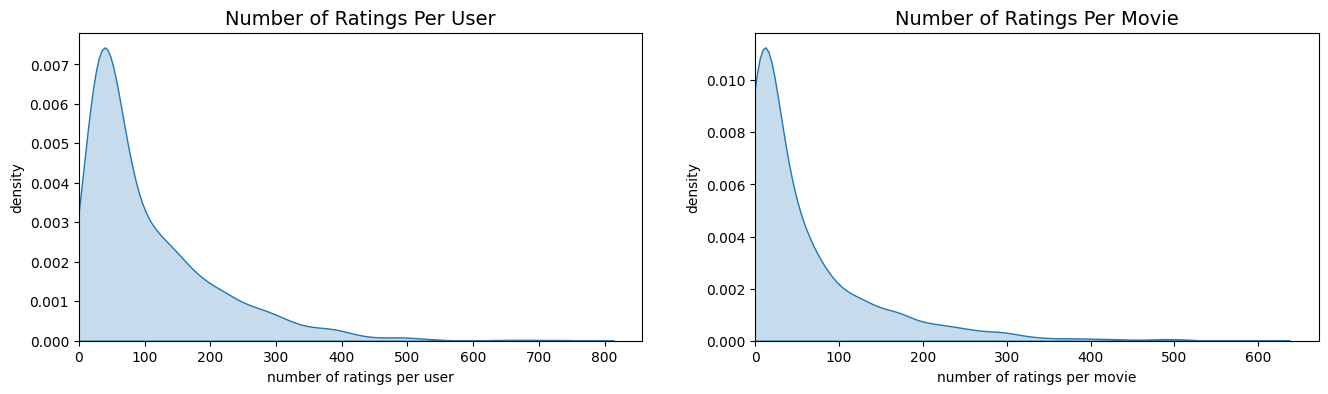

In [54]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_movie, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per Movie", fontsize=14)
plt.xlabel("number of ratings per movie")
plt.ylabel("density")
plt.show()

In [32]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    
    X = X.T
    neighbour_ids = []
    
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [33]:
similar_movies = find_similar_movies(1, Q, movie_mapper, movie_inv_mapper, k=10)
similar_movies

[151, 222, 121, 181, 50, 473, 405, 117, 15]

In [34]:
movie_idx = dict(zip(u_movies_new['title'], list(u_movies_new.index)))

In [35]:
n_movies = u_movies['movie_id'].nunique()
print(f"There are {n_movies} unique movies in our movies dataset.")

There are 1682 unique movies in our movies dataset.


In [36]:
genres = set(g for G in u_movies_new['genres'] for g in G)

for g in genres:
    u_movies_new[g] = u_movies_new.genres.transform(lambda x: int(g in x))
    
movie_genres = u_movies_new.drop(columns=['movie_id', 'title','genres'])

/var/folders/8z/9yvk4rkj3vsfh47h5btvvk_c0000gn/T/ipykernel_43987/2384795628.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u_movies_new[g] = u_movies_new.genres.transform(lambda x: int(g in x))
/var/folders/8z/9yvk4rkj3vsfh47h5btvvk_c0000gn/T/ipykernel_43987/2384795628.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u_movies_new[g] = u_movies_new.genres.transform(lambda x: int(g in x))
/var/folders/8z/9yvk4rkj3vsfh47h5btvvk_c0000gn/T/ipykernel_43987/2384795628.py:4: SettingWithCopyWarning: 
A value

In [37]:
movie_genres.head()

,War,Romance,Sci-Fi,Film-Noir,Thriller,Drama,Adventure,Horror,Fantasy,Mystery,Children,Animation,Comedy,Musical,Documentary,Action,Western,unknown,Crime
0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(movie_genres, movie_genres)
print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our genres cosine similarity matrix: (1682, 1682)


In [39]:
from fuzzywuzzy import process

def movie_finder(title):
    all_titles = u_movies_new['title'].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0]

In [40]:
def get_last_watched_movie():
    # Ask the user for the last movie they watched
    last_movie = input("What was the last movie you watched? ")

    # Return the user's input
    return last_movie

In [41]:
def get_content_based_recommendations(title_string, n_recommendations=10):
    title = movie_finder(title_string)
    idx = movie_idx[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    similar_movies = [i[0] for i in sim_scores]
    print(f"Because you watched {title}:")
    print(u_movies_new['title'].iloc[similar_movies].tolist())
    return u_movies_new['movie_id'].iloc[similar_movies].tolist()
    

In [43]:
user_idf = int(input("Enter your user ID (an integer): "))

last_watched_movie = movie_finder(get_last_watched_movie())

content_list_movies=get_content_based_recommendations(last_watched_movie , 20)

Enter your user ID (an integer):  23
What was the last movie you watched?  bat


Because you watched Batman Forever (1995):
['Batman Returns (1992)', 'Rumble in the Bronx (1995)', 'Batman & Robin (1997)', 'Three Musketeers, The (1993)', 'Cliffhanger (1993)', 'Operation Dumbo Drop (1995)', 'Princess Bride, The (1987)', 'Evil Dead II (1987)', 'Men in Black (1997)', 'True Lies (1994)', 'Batman (1989)', 'Hard Target (1993)', 'Best Men (1997)', 'Striptease (1996)', 'Ghost and the Darkness, The (1996)', 'Raiders of the Lost Ark (1981)', 'Sting, The (1973)', 'Indiana Jones and the Last Crusade (1989)', 'Grosse Pointe Blank (1997)', 'Kull the Conqueror (1997)']


In [47]:
movie_id = (movie_idx[last_watched_movie]+1)
movie_titles = dict(zip(u_movies_new['movie_id'], u_movies_new['title']))
similar_movies = find_similar_movies(movie_id, Q, movie_mapper, movie_inv_mapper, metric='euclidean', k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Batman Forever (1995):
Net, The (1995)
Waterworld (1995)
Three Musketeers, The (1993)
Cliffhanger (1993)
Young Guns (1988)
First Knight (1995)
Demolition Man (1993)
Batman Returns (1992)
Outbreak (1995)


In [48]:
from sklearn.neighbors import NearestNeighbors

def find_similar_user(user_id, X, user_mapper, user_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given movie id.
    
    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations
    
    Output: returns list of k similar movie ID's
    """
    X = X
    neighbour_ids = []
    
    user_ind = user_mapper[user_id]
    user_vec = X[user_ind]
    if isinstance(user_vec, (np.ndarray)):
        user_vec = user_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(user_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(user_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [49]:
similar_user = find_similar_user(user_idf, Q, user_mapper, user_inv_mapper, k=10)
similar_user

[148, 1, 307, 514, 625, 25, 97, 44, 601]

In [50]:
def calculate_mean_ratings(Q, movie_id_list, user_id_list, movie_mapper, user_mapper):
    movie_ratings_list = []
    for movie_id in movie_id_list:
        movie_idx = movie_mapper[movie_id]
        ratings = []
        for user_id in user_id_list:
            user_idx = user_mapper[user_id]
            rating = Q[user_idx, movie_idx]
            if rating != 0:  # Only consider non-zero ratings
                ratings.append(rating)
        mean_rating = sum(ratings) / len(ratings) if ratings else None
        movie_ratings_list.append(mean_rating)
    return movie_ratings_list

# Example usage
movie_id_list = content_list_movies
user_id_list = similar_user
mean_ratings_list = calculate_mean_ratings(Q, movie_id_list, user_id_list, movie_mapper, user_mapper)
#print("Mean ratings for movies:", mean_ratings_list)
movie_ratings_dict = dict(zip(movie_id_list, mean_ratings_list))

# Print the resulting dictionary
#print("Movie Ratings Dictionary:", movie_ratings_dict)
# Sort movie_ratings_dict by mean ratings in descending order
sorted_movie_ratings = dict(sorted(movie_ratings_dict.items(), key=lambda item: item[1], reverse=True))

# Print the sorted dictionary
print("Sorted Movie Ratings Dictionary (Descending Order):", sorted_movie_ratings)

# Extract movie IDs from the keys of sorted_movie_ratings
sorted_movie_ids_list = list(sorted_movie_ratings.keys())




Sorted Movie Ratings Dictionary (Descending Order): {173: 4.20813678224346, 174: 4.183106654873985, 210: 2.4872380583850497, 257: 2.3392564917557594, 194: 1.4513695350169116, 24: 1.4502583369227593, 403: 1.3700570026956376, 248: 1.1711589665981113, 385: 0.9780093952381844, 201: 0.8395201369287966, 231: 0.7849921703900989, 399: 0.32075283312439534, 120: 0.2861080863006319, 148: 0.26622529436486847, 254: 0.2454660198791721, 576: 0.2358075800396532, 802: 0.1769835299996504, 110: 0.10613010102381382, 266: 0.05413550505853814, 1138: 0.03406386688623036}


In [51]:
# Create a dictionary with movie_id as key and title as value
movie_dict = movie_stats.set_index('movie_id')['title'].to_dict()

# Print the resulting dictionary
#print("Movie Dictionary:", movie_dict)
# Assuming you have a movie_dict dictionary mapping movie IDs to titles
movie_titles_list = [movie_dict.get(movie_id, "Unknown Title") for movie_id in sorted_movie_ids_list]

# Print the resulting list of movie titles
print("Sorted Movie Titles (Descending Order):", movie_titles_list)


Sorted Movie Titles (Descending Order): ['Princess Bride, The (1987)', 'Raiders of the Lost Ark (1981)', 'Indiana Jones and the Last Crusade (1989)', 'Men in Black (1997)', 'Sting, The (1973)', 'Rumble in the Bronx (1995)', 'Batman (1989)', 'Grosse Pointe Blank (1997)', 'True Lies (1994)', 'Evil Dead II (1987)', 'Batman Returns (1992)', 'Three Musketeers, The (1993)', 'Striptease (1996)', 'Ghost and the Darkness, The (1996)', 'Batman & Robin (1997)', 'Cliffhanger (1993)', 'Hard Target (1993)', 'Operation Dumbo Drop (1995)', 'Kull the Conqueror (1997)', 'Best Men (1997)']


In [52]:
print(movie_idx[last_watched_movie])
print(last_watched_movie)

28
Batman Forever (1995)
